### 4장 : 수치요약과 상자그림

`-` review

> 줄기-잎 그림은 막대그래프와 유사하나, 정보가 더 많다.
>
> 데이터의 분포(어느 쪽으로 치우친 분포인지, 이상치가 있는지)

* 데이터 분석에서는 저항성 있는 통계량을 선호한다 : 중앙값 (자료가 기울어져 있거나 이상치가 있는 경우)

> 오른쪽으로 긴 꼬리에서의 평균은 전체의 절반 이상이 미달
>
> 왼쪽으로 긴 꼬리에서의 평균은 전체의 절반 이상이 초과

* 다섯 수치의 요약 : 최소값, 아래 경첩(제 1사분위수), 중위수, 위 경첩(제 3사분위수), 최대값

> $N$ : 자료의 갯수
>
> $X_{(1)} ≤ \dots ≤ X_{(N)}$ : 순서통계량
>
> 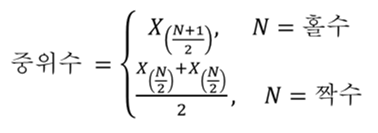

* 중위수의 깊이

> 위 또는 아래에서 몇 번째 숫자인지.
>
> $min$(위로부터 순위, 아래로부터의 순위)

$\to$ 중위수 깊이 $d(M) = (N+1)/2$ (짝수일 경우 내림)

* 경첩(hinge)

> $d(H) = [d(ME) + 1]/2$, 단, $[x] = x$를 넘지 않는 최대의 정수
>
> $H_L = $아래 경첩(Lower Hinge), $H_U = $위 경첩(Upper Hinge).
>
> $\frac{(H_U - M) - (M - H_L)}{(H_U - M) + (M - H_L)}$

* <span style:background-color>R 함수를 이용한 계산

`summary(series)` : 다섯 수치 + 평균

$X_{(1)} ≤ \dots ≤ X_{(k)} ≤ \dots ≤ X_{(N)}$ : 순서통계량

`-` 비율(p)로부터 순위(k)찾기 : 보간법 이용

$p(k) = \frac{k - \frac{1}{3}}{N + \frac{1}{3}} = Np + \frac{p}{3} + \frac{1}{3}$

> 중위수가 x의 분포와 상관없이 불편성을 지니기 때문에 사용한다.

* R : `quantile(data_arr, percentage_arr, type = int[1:9])` (옵션 : type 불연속 1\~3 / 연 4~9) type = 8 사용.

> `type = 8`이 저항성이 높은 통계량을 사용한다.

`-` 문자값 전시 : 수치요약을 일정한 형식으로 전시함

중앙값 M / 4분위수 H / 8분위수 E / 16분위수 D : 각 수치의 중앙값의 추이로 왜도를 측정한다.

> 중앙값이 계속 작아지면 왼쪽으로 기울어진 분포 / 계속 커지면 오른쪽으로 기울어진 분포

분위수의 산포(범위)로 첨도를 측정한다.

> 산포가 작았다가 급격하게 커질수록 첨도가 커진다.

In [26]:
chi <- rchisq(1000, 2)

In [27]:
L = quantile(chi, c(0.0625, 0.125, 0.25, 0.5), type = 8)
L  ## lower quantile

6.25%     12.5%       25%       50% 
0.1199288 0.2584028 0.5894398 1.3798985

In [28]:
U = quantile(chi, c(0.9375, 0.875, 0.75, 0.5), type = 8)
U  ## upper quantile

93.75%    87.5%      75%      50% 
5.425595 4.228049 2.660464 1.379898

In [29]:
apply(data.frame(L, U), 1, mean)

6.25%    12.5%      25%      50% 
2.772762 2.243226 1.624952 1.379898

> 위와 같이 직접 확인해보면 중앙값이 점점 커지는 것을 확인할 수 있다.(오른쪽으로 기울어진 분포)